#**THE SPARKS FOUNDATION**

#**Graduate Rotational Internship Program**

##***Data Science And Business Analytics Tasks***

###**Author: Akash Jain**


##**TASK 3 - Exploratory Data Analysis - Retail**

* Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.
* Dataset can be found at https://bit.ly/3i4rbWI
* As a business manager, try to find out the weak areas where you can work to make more profit.
* What all business problems you can derive by exploring the data?



#**Exploratory Data Analysis**
Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

#**Step1: Data Preparation And Processing**
#Import the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Loading dataset


In [2]:
df=pd.read_csv('/content/drive/MyDrive/dataset/SampleSuperstore.csv')

# Display first 5 rows of the dataset


In [3]:
df.head() 

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Check no of rows and columns in the dataset


In [4]:
df.shape 

(9994, 13)

There are 150 rows and 4 columns in the dataframe

# Check if there are missing values on any columns and their data type


In [5]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No missing values in the dataframe

# Display the full summary of the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.describe().round(2)

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00,9994.00
mean,55190.38,229.86,3.79,0.16,28.66
std,32063.69,623.25,2.23,0.21,234.26
min,1040.00,0.44,1.00,0.00,-6599.98
25%,23223.00,17.28,2.00,0.00,1.73
50%,56430.50,54.49,3.00,0.20,8.67
75%,90008.00,209.94,5.00,0.20,29.36
max,99301.00,22638.48,14.00,0.80,8399.98


In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [11]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [12]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [13]:
df['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Missouri City      1
Kissimmee          1
Norfolk            1
Jupiter            1
Murrieta           1
Name: City, Length: 531, dtype: int64

In [14]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [15]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [16]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [17]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

#**Step2: Data Cleaning**

#Handling duplicate values

In [18]:
df.duplicated().sum()

17

In [19]:
# Display duplicate data
df[df.duplicated()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [20]:
# Removing duplicate values
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

#Dropping Irrelevant Columns

In [21]:
df_retail=df.copy()

In [22]:
df_retail=df_retail.drop(['Postal Code','Country'],axis=1)

In [23]:
df_retail.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#**Step3: Data Correlation**

In [24]:
# Correlation Analysis
corr_mat = df_retail.corr()
corr_mat

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


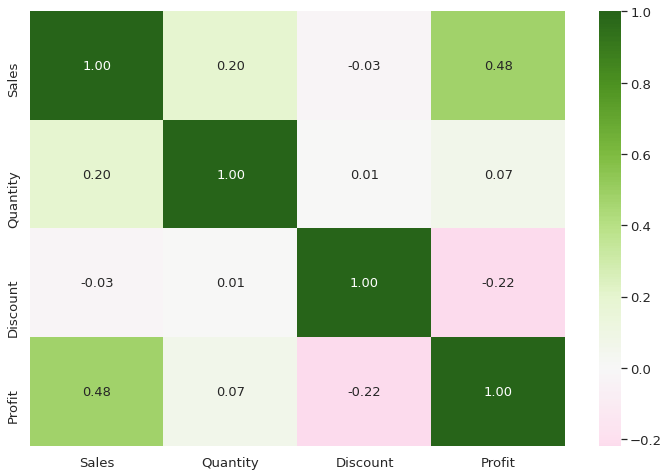

In [25]:
#create a heatmap to demonstrate the correlation magnitude among the variables
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, annot_kws={'fontsize':13},
            fmt=".2f", cmap='PiYG', center=0)

#**Step4: Removing Outliers**

In [26]:
# Calculating Z-score
sorted_data = df_retail.sort_values(by='Sales', ascending = False)
sorted_data['Z-Score'] = (sorted_data.Sales - sorted_data.Sales.mean()) / sorted_data.Sales.std()
sorted_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Z-Score
2697,Standard Class,Home Office,Jacksonville,Florida,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.926827
6826,Standard Class,Corporate,Lafayette,Indiana,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.688325
8153,First Class,Consumer,Seattle,Washington,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.076861
2623,First Class,Home Office,New York City,New York,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.587690
4190,Standard Class,Consumer,Newark,Delaware,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.465398


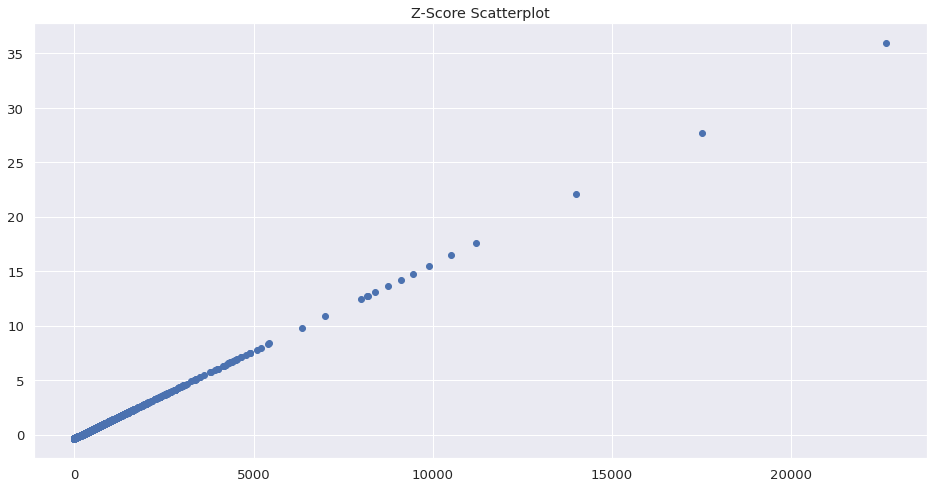

In [27]:
# Z-score Scatterplot
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(sorted_data['Sales'], sorted_data['Z-Score'])
plt.title('Z-Score Scatterplot')
plt.show()

In [28]:
# Z-score threshold=3
sorted_data = sorted_data[sorted_data['Z-Score']<3]
sorted_data.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Z-Score
6467,Standard Class,Home Office,Providence,Rhode Island,East,Office Supplies,Storage,2079.400,5,0.0,582.2320,2.964867
949,Standard Class,Home Office,Philadelphia,Pennsylvania,East,Furniture,Tables,2065.320,12,0.4,-619.5960,2.942293
3628,Standard Class,Consumer,Seattle,Washington,West,Office Supplies,Binders,2060.744,7,0.2,643.9825,2.934956
3043,Same Day,Home Office,Long Beach,California,West,Furniture,Chairs,2054.272,8,0.2,256.7840,2.924580
8168,Standard Class,Home Office,Seattle,Washington,West,Furniture,Tables,2036.860,7,0.0,366.6348,2.896664
9615,First Class,Corporate,Seattle,Washington,West,Office Supplies,Binders,2033.584,2,0.2,762.5940,2.891411
3150,First Class,Consumer,Newark,Ohio,East,Technology,Accessories,2025.360,6,0.2,607.6080,2.878226
9490,Standard Class,Consumer,San Francisco,California,West,Office Supplies,Binders,2022.272,8,0.2,682.5168,2.873275
6879,Second Class,Home Office,Seattle,Washington,West,Furniture,Chairs,2003.920,5,0.2,125.2450,2.843852
5918,Standard Class,Consumer,New York City,New York,East,Furniture,Bookcases,2003.920,5,0.2,-25.0490,2.843852


In [29]:
df_retail=sorted_data
df_retail=df_retail.drop(['Z-Score'],axis=1)
df_retail.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6467,Standard Class,Home Office,Providence,Rhode Island,East,Office Supplies,Storage,2079.400,5,0.0,582.2320
949,Standard Class,Home Office,Philadelphia,Pennsylvania,East,Furniture,Tables,2065.320,12,0.4,-619.5960
3628,Standard Class,Consumer,Seattle,Washington,West,Office Supplies,Binders,2060.744,7,0.2,643.9825
3043,Same Day,Home Office,Long Beach,California,West,Furniture,Chairs,2054.272,8,0.2,256.7840
8168,Standard Class,Home Office,Seattle,Washington,West,Furniture,Tables,2036.860,7,0.0,366.6348


#**Step5: Exploratory Data Analysis**

#Univariate Analysis

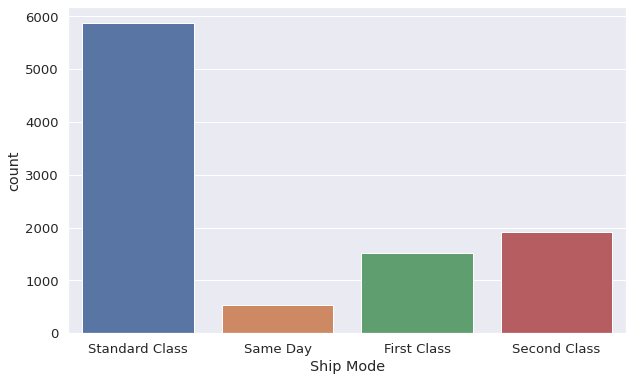

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_retail['Ship Mode'])

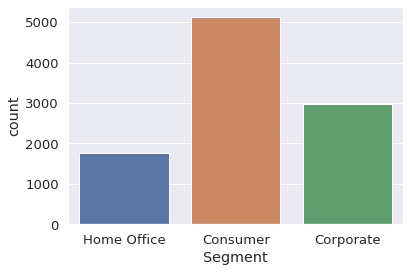

In [31]:
sns.countplot(x=df_retail['Segment'])

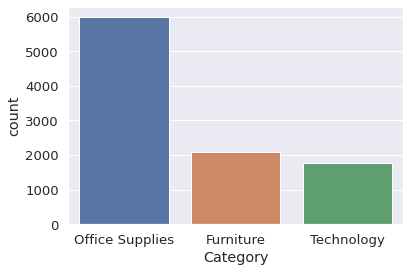

In [32]:
sns.countplot(x=df_retail['Category'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

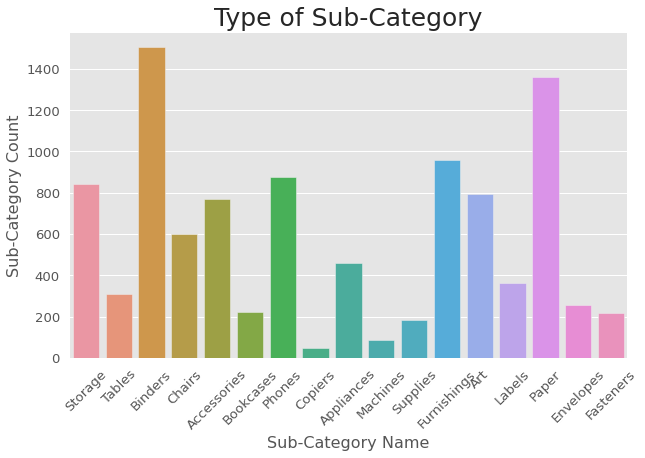

In [33]:
plt.style.use('ggplot')
plt.figure(figsize= (10,6))
ax = sns.countplot(x = "Sub-Category", data = df_retail)
ax.set_title("Type of Sub-Category", fontsize = 25)
ax.set_xlabel("Sub-Category Name", fontsize = 16,)
ax.set_ylabel("Sub-Category Count", fontsize = 16)
plt.xticks(rotation=45)

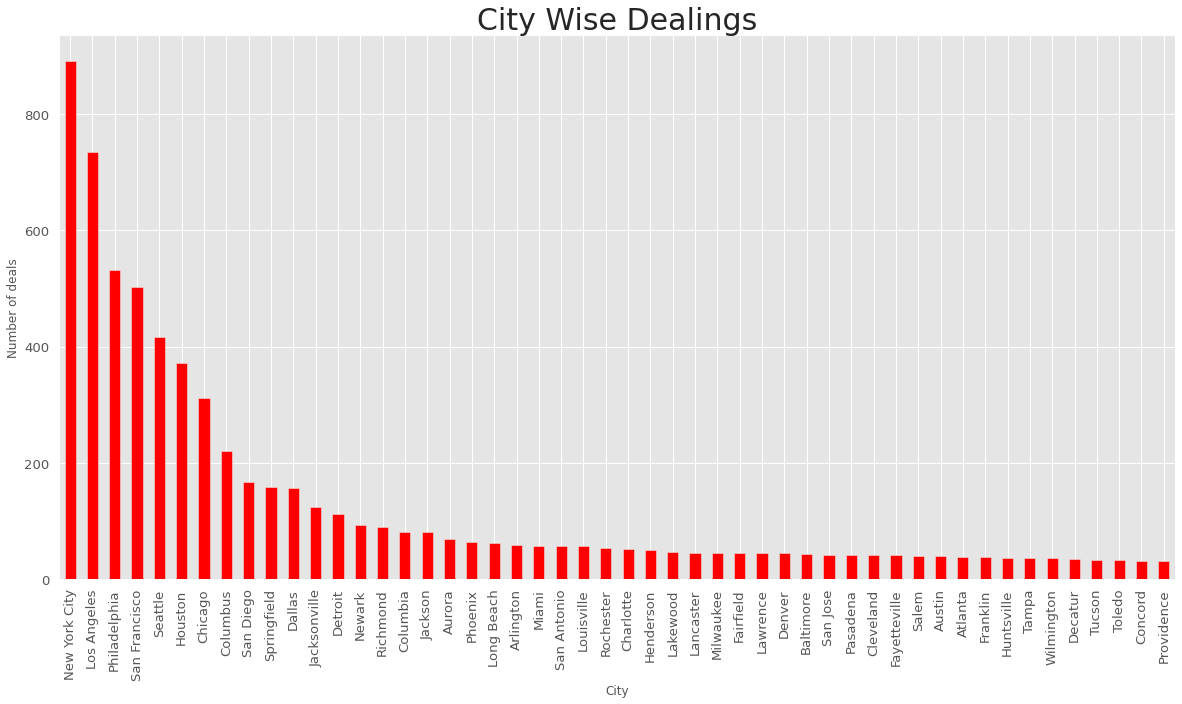

In [44]:
df_city = df_retail['City'].value_counts()
df_city=df_city.head(50)
df_city.plot(kind='bar',figsize=(20,10),color='red')
plt.ylabel('Number of deals')
plt.xlabel('City')
plt.title('City Wise Dealings', fontsize = 30)
plt.show()


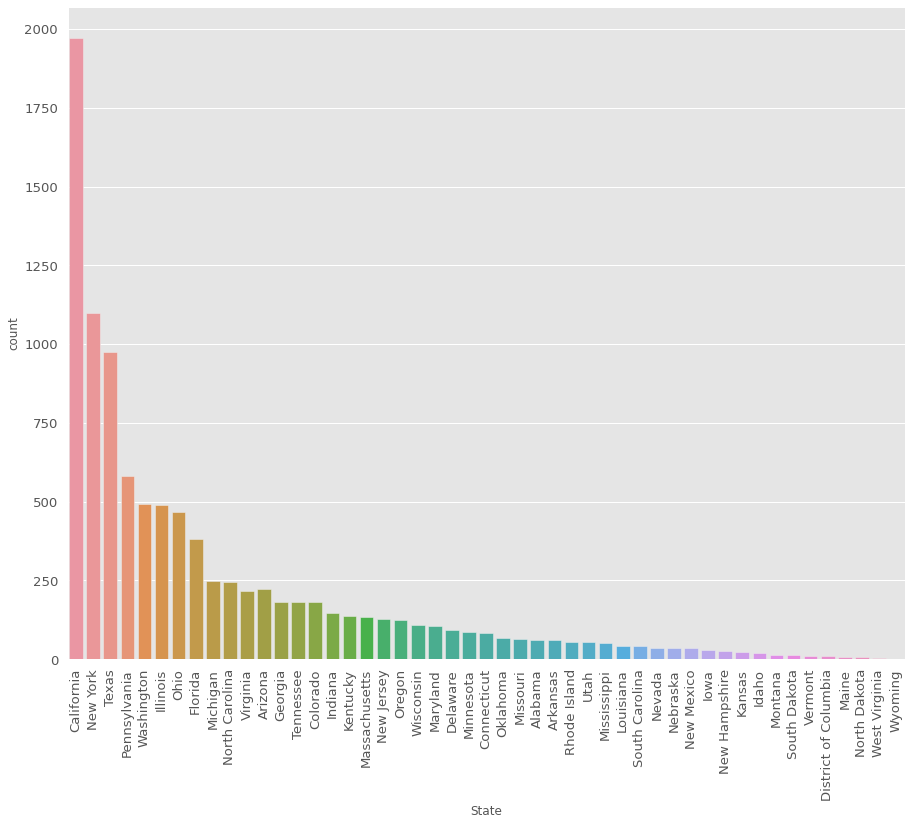

In [46]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df_retail,order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

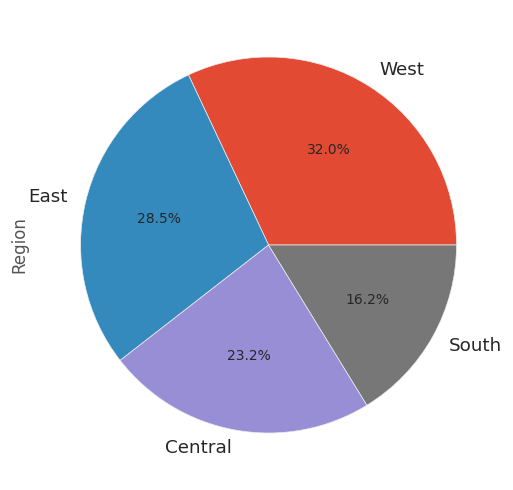

In [59]:
plt.figure(figsize =(14, 5), dpi=100)
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.tight_layout();

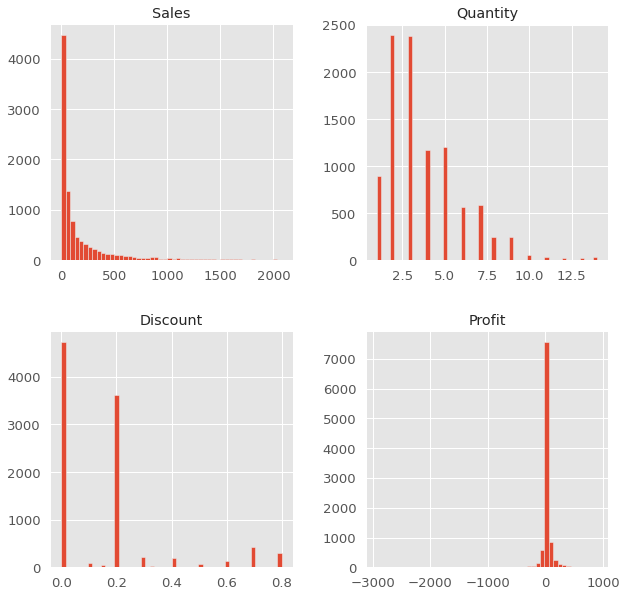

In [64]:
df_retail.hist(figsize=(10,10),bins=50)
plt.show()

#Multivariate Analysis

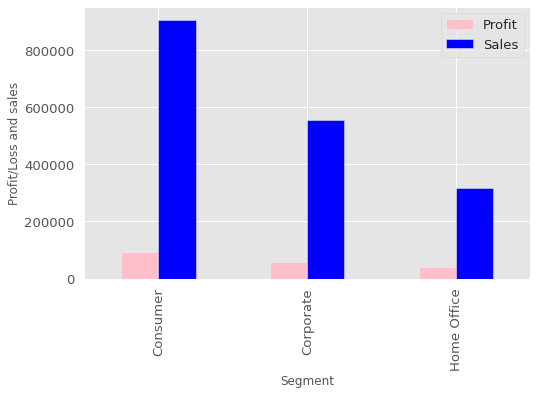

In [65]:
df_retail.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['pink','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

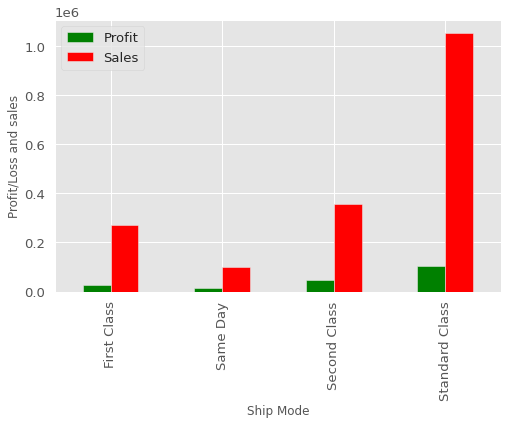

In [68]:
df_retail.groupby('Ship Mode')[['Profit','Sales']].sum().plot.bar(color=['green','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

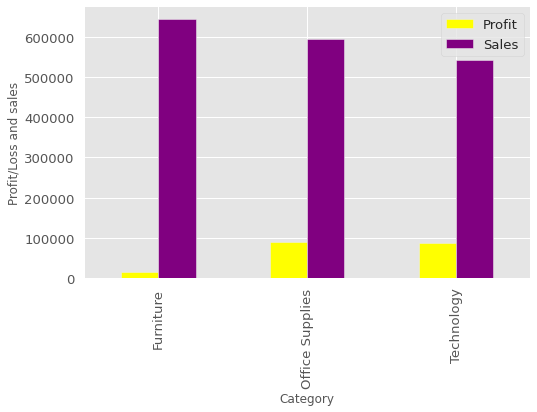

In [88]:
df_retail.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

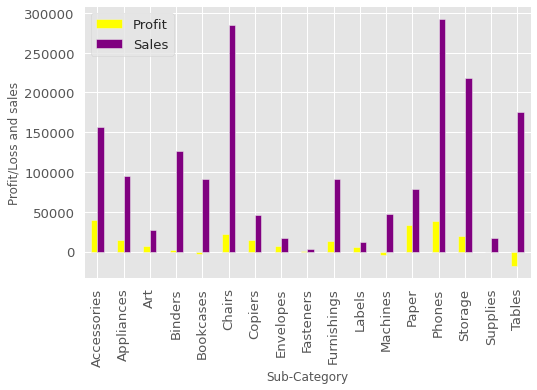

In [92]:
df_retail.groupby('Sub-Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

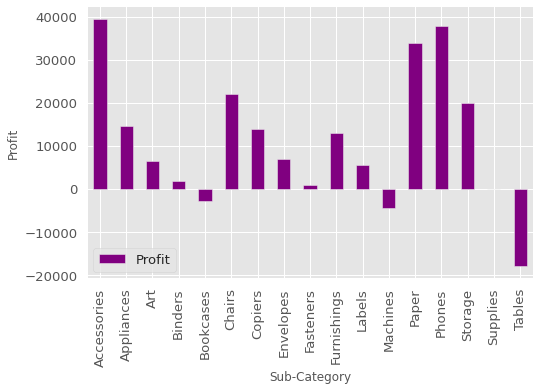

In [93]:
df_retail.groupby('Sub-Category')[['Profit']].sum().plot.bar(color=['purple'],figsize=(8,5))
plt.ylabel('Profit')
plt.show()

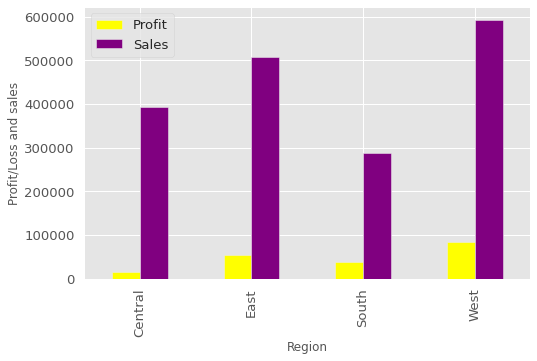

In [94]:
df_retail.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

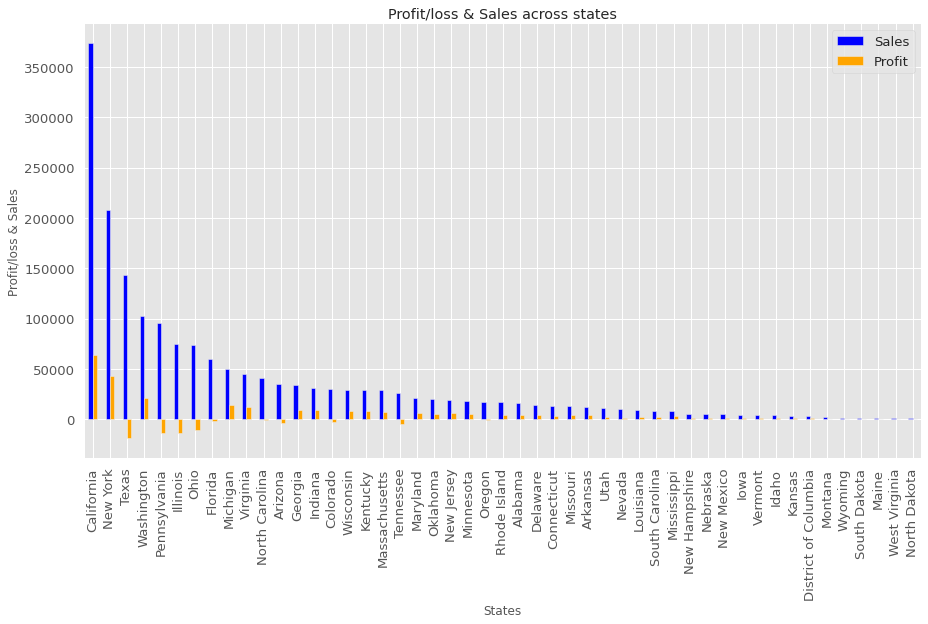

In [95]:
ps = df_retail.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

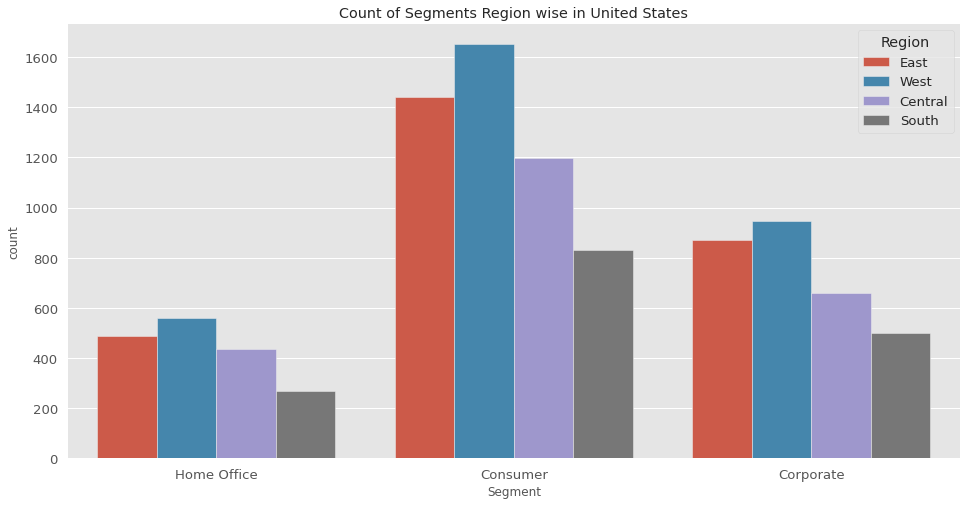

In [72]:
# Count of Segment region wise
plt.figure(figsize=(16,8))
sns.countplot(x="Segment", hue="Region", data=df_retail)
plt.title('Count of Segments Region wise in United States')
plt.show()

<Figure size 1152x576 with 0 Axes>

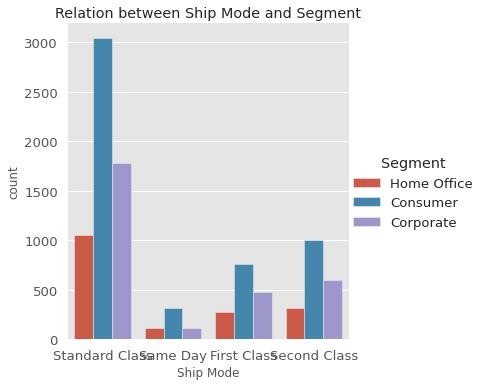

In [81]:
# Relation between Ship Mode and Segment
plt.figure(figsize=(16,8))
sns.catplot(x="Ship Mode", data=df_retail, hue="Segment",kind="count")
plt.title('Relation between Ship Mode and Segment')
plt.show()

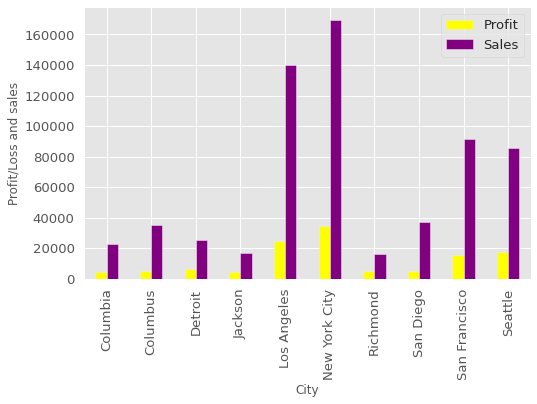

In [109]:
# Top 10 City wise Profit and Sales
df_retail_top_10_cities = df_retail.groupby("City")[["Profit", "Sales"]].sum().reset_index().sort_values(by="Profit",ascending=False)
new_df=df_retail_top_10_cities.head(10)
new_df.groupby('City')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

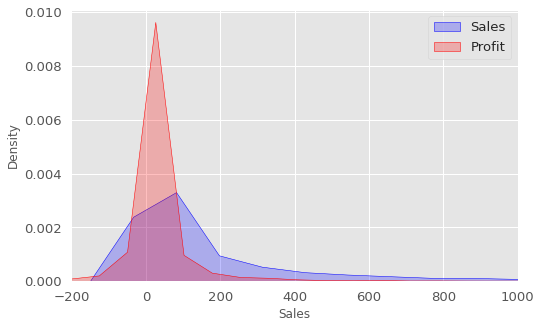

In [115]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Sales'],color='blue', palette="crest",label='Sales',shade=True, legend=True, bw_method='scott',bw_adjust=0.5)
sns.kdeplot(df['Profit'],color='red', palette="crest",label='Profit',shade=True, legend=True, bw_method='scott',bw_adjust=0.5)
plt.xlim([-200,1000])
plt.legend()

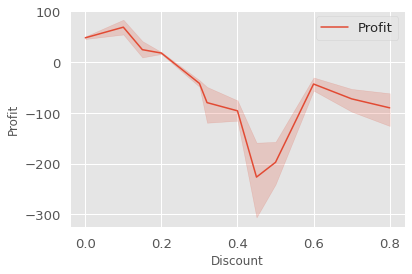

In [105]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df_retail)
plt.legend()
plt.show()

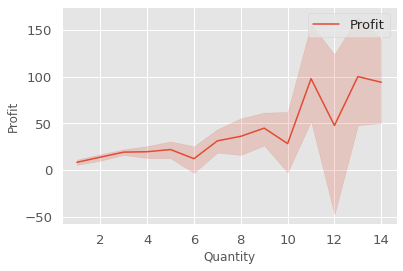

In [108]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df_retail)
plt.legend()
plt.show()

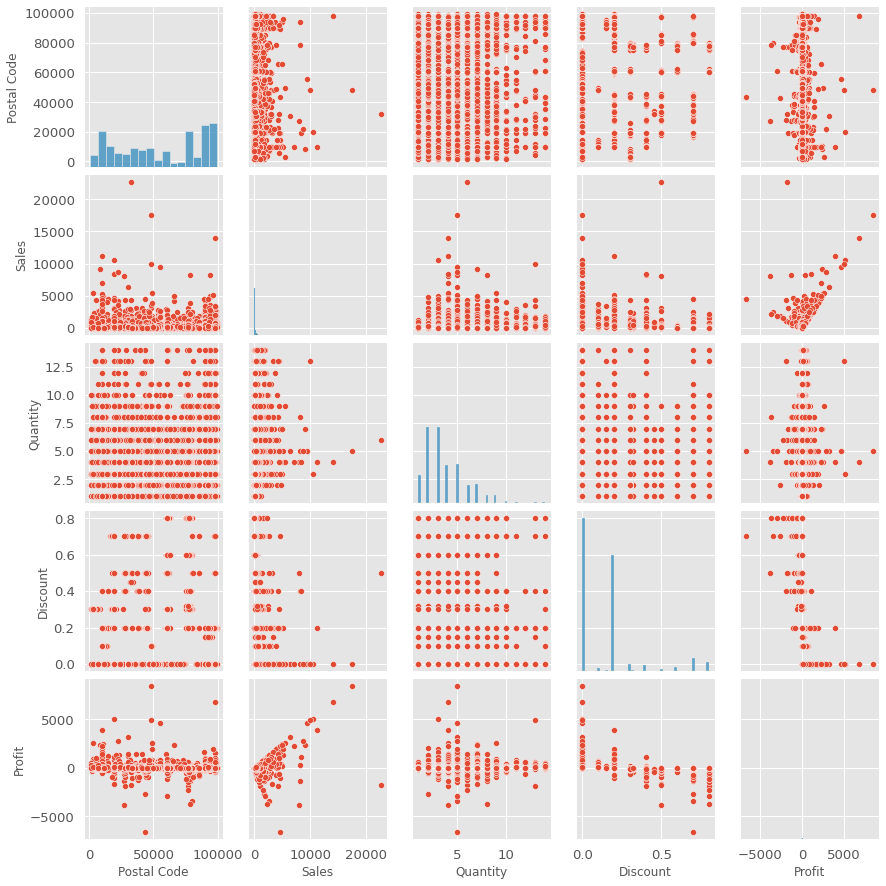

In [114]:
sns.pairplot(df)

In [117]:
df_retail['Segment'].value_counts()
df_segment= df_retail.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,176.993180,0.158364,18.124646
Corporate,186.625548,0.159089,19.376767
Home Office,181.852793,0.147334,23.275882


Text(0.5, 1.0, 'Segmentwise analysis Parameters:\nSale, Discount, Profit')

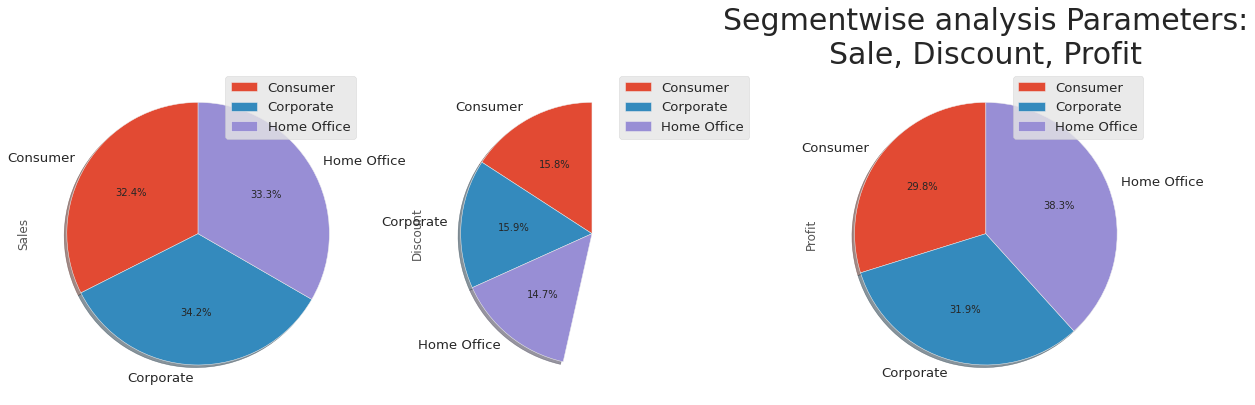

In [120]:
df_segment.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20,20),
                    startangle=90,     
                    shadow=True,
                    labels = df_segment.index)
plt.title(
    'Segmentwise analysis Parameters:\n' 
    'Sale, Discount, Profit',
    fontsize = 30
)

In [121]:
df_city1= df_retail.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df_city_profit = df_city1.sort_values('Profit')
df_city_profit.head()


,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Clarksville,316.818571,0.271429,-150.764743
Medina,275.302444,0.433333,-149.227178


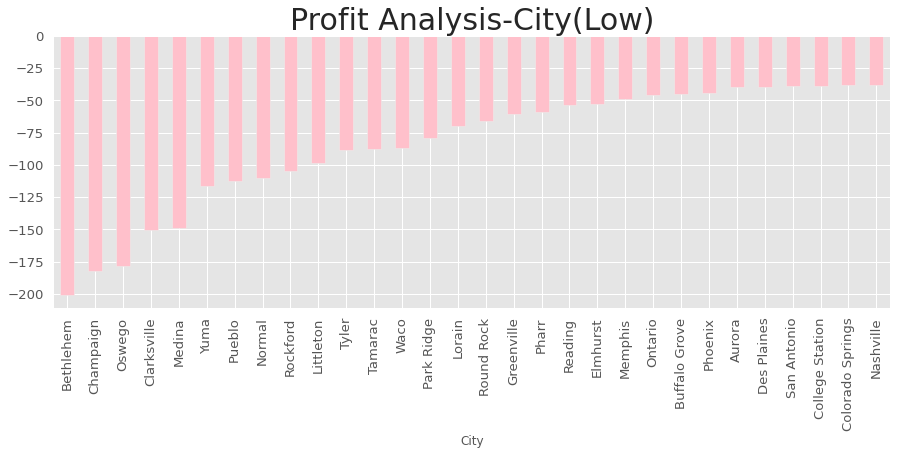

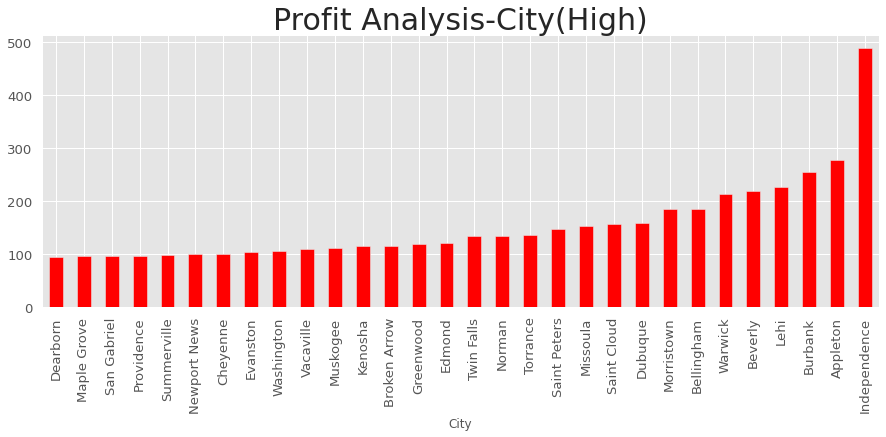

In [123]:
df_city_profit['Profit'].head(30).plot(kind='bar',figsize=(15,5),color = 'Pink')
plt.title('Profit Analysis-City(Low)',fontsize=30)
plt.show()
df_city_profit['Profit'].tail(30).plot(kind='bar',figsize=(15,5),color = 'Red')
plt.title('Profit Analysis-City(High)',fontsize=30)
plt.show()